<a href="https://colab.research.google.com/github/priyanshukoshta5/Colab-Projects/blob/main/DL_Practical_6_Sparse_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tqdm import tqdm

for i in tqdm(range(int(10000000))):
    pass

100%|██████████| 10000000/10000000 [00:08<00:00, 1188744.76it/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, ActivityRegularization

In [ ]:
sparse_encoder = Sequential([
                    Flatten(input_shape = (28,28)),
                    Dense(128, activation = 'selu'),
                    Dense(32, activation = 'selu'),
                    ActivityRegularization(l1=1e-3)
])

In [ ]:
sparse_decoder = Sequential([
                    Dense(128, activation = 'selu', input_shape = (32, )),
                    Dense(28*28, activation = 'sigmoid'),
                    Reshape([28, 28])
])

In [ ]:
sparse_autoencoder = Sequential([sparse_encoder, sparse_decoder])

In [ ]:
sparse_autoencoder.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.SGD(lr=.1))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history  =  sparse_autoencoder.fit(X_train, X_train, epochs = 30, validation_data = (X_test, X_test))

Epoch 1/30
1875/1875 [==============================] - 13s 6ms/step - loss: 0.3413 - val_loss: 0.2813
Epoch 2/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2688 - val_loss: 0.2567
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2475 - val_loss: 0.2362
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2282 - val_loss: 0.2192
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2147 - val_loss: 0.2080
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2047 - val_loss: 0.1988
Epoch 7/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1964 - val_loss: 0.1912
Epoch 8/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1897 - val_loss: 0.1853
Epoch 9/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1843 - val_loss: 0.1804
Epoch 10/30
1875/1875 [==============================] - 12s 6ms/step - l

In [ ]:
type(history)

keras.callbacks.History

In [ ]:
type(history.history)

dict

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

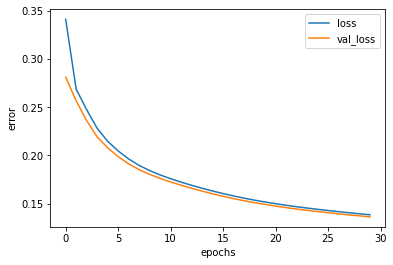

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('error')
plt.legend()
plt.show()

1/1 [==============================] - 0s 203ms/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

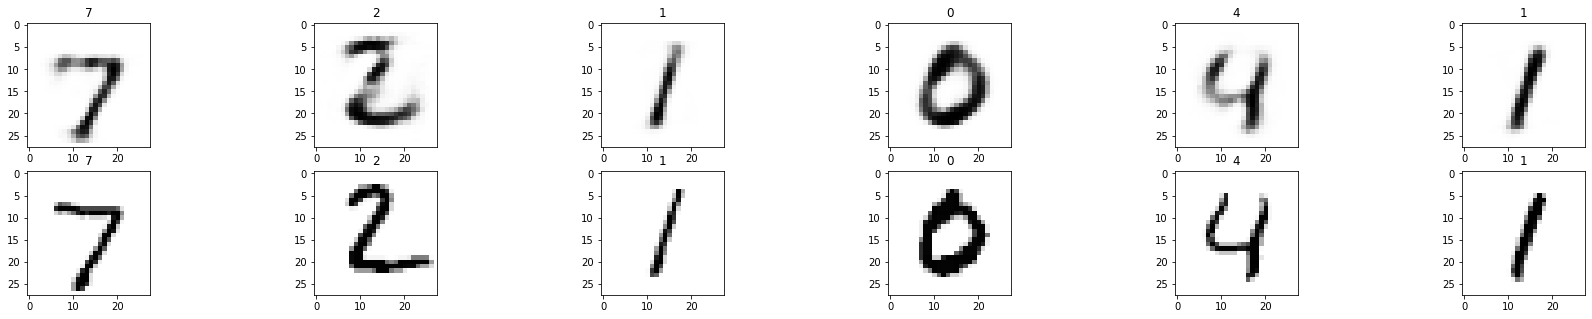

In [ ]:
to_predict = X_test[:6]
prediction = sparse_autoencoder.predict(to_predict)

def visualize_predictions(predictions, data):
    fig, axes = plt.subplots(2, predictions.shape[0], figsize = (predictions.shape[0]*5, 5))
    for i, ax in zip(range(predictions.shape[0]), axes[0, :]):
        ax.imshow(predictions[i], cmap = 'Greys')
        ax.set_title(y_test[i])
    for i, ax in zip(range(predictions.shape[0]), axes[1, :]):
        ax.imshow(X_test[i], cmap = 'Greys')
        ax.set_title(y_test[i])    
    return plt

visualize_predictions(prediction, to_predict)

In [ ]:
from sklearn.manifold import TSNE

# Select 1000 samples from data
X_test_sampled = X_test[:1000, :]
y_test_sampled = y_test[:1000]

# Visualizing the Latent representation - Taking the average of the volume
x_compressed = sparse_encoder.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(x_compressed)

32/32 [==============================] - 0s 4ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0, 0.5, 'tsne 2')

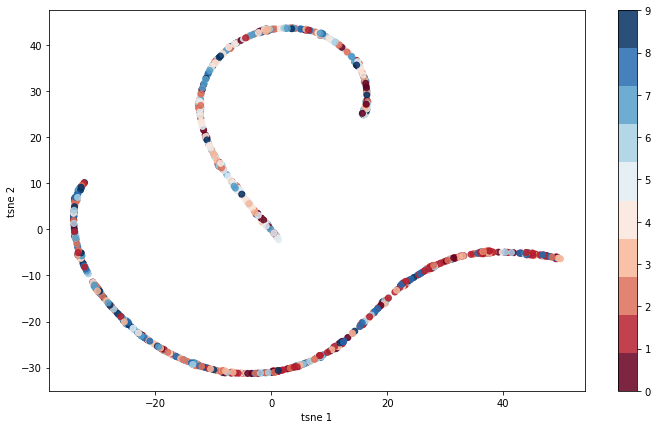

In [ ]:
# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
#plt.colorbar(sc)